# EDA (Exploratory Data Analysis)

 Consiste en investigar y comprender los datos mediante técnicas visuales y estadísticas para descubrir patrones, identificar anomalías, probar hipótesis y extraer información útil. <div>El EDA ayuda a los científicos de datos y analistas a obtener una comprensión inicial de los datos antes de aplicar modelos predictivos o análisis más avanzados. 

***"Esta es la acontinuación del archivo EDA.ipynb"***  

## 1. Conociemiento del negocio 

### ***Contexto***

---------------------------------------
##### Steam, una plataforma multinacional de videojuegos, donde distribuye digitalmente videojuegos desarrollada por Valve Corporation. Fue lanzada en septiembre de 2003 como una forma para Valve de proveer actualizaciones automáticas a sus juegos, pero finalmente se amplió para incluir juegos de terceros.  *Objectivo; Steam pide que te encargues de crear un sistema de recomendación de videojuegos para usuarios.*

**Preguntas**
>
>
> **1.Datos** <div>
> 1. ¿En qué formato se encuentra los datos? 
> 2. ¿Qué variables (Columnas) estan disponibles en el cojunto de datos?
> 3. ¿Qué tipos de datos están incluidos? 
> 4. ¿Hay Valores faltantes?
> 5. ¿Hay columnas anidadas? </div>
>  
> **2.Analisís Descriptivo** <div>
> 1. ¿Cuál es el promedio de juagdores de Valve o Steam? ; Cada año?
> 2. ¿Cuál es la distribución de las variables categóricas (frecuencia de cada categoría)? </div>
> 
> **3. Analisís de Juegos** <div>
> 1. ¿Cuáles son los juegos con la mayor cantidad de jugadores? 
> 2. ¿Cómo se distribuyen los precios de los juegos? 
> 3. ¿Existe alguna correlación entre el precio de un juego y su popularidad o calificación? </div>
> 
> **4. Analísis de Reseñas** <div>
> 1.  ¿Cómo se distribuyen las calificaciones de las reseñas a lo largo del tiempo? 
> 2. Hay alguna tendencia temporal en las calificaciones de las reseñas (por ejemplo, aumentos o disminuciones notables en ciertos períodos)? </div>
>
>
> **5. Adicional** <div>
> 1. ¿Qué variables están más correlacionadas con las calificaciones de los juegos (precio, cantidad de reseñas, cantidad de items, etc.)? </div>

***Las preguntas pueden cambiar***

## 2. Entendimiento de datos

###  ***Data***  ***items***

### 2.1 Importamos  librerías

In [1]:
# Importamos las librerias 
import pandas as pd  # type: ignore
import numpy as np # type: ignore
import seaborn as sns  # type: ignore
import matplotlib.pyplot as plt # type: ignore
import ast
import warnings 
warnings.filterwarnings('ignore')

### 2.2 Carga inicial de los datos

In [2]:
def load_json_lines(file_path):
    data = []
    with open(file_path, "r", encoding="utf-8") as file:
        for line in file:
            data.append(ast.literal_eval(line))
    return pd.DataFrame(data)

In [3]:
# Cargar archivos 
df = load_json_lines("Data/australian_users_items.json")

In [4]:
# Tenemos un punto de reinicio 
df_items = df

### 2.3 Análisis inicial de los datos

In [5]:
# Tamaño de nuestra data
df_items.shape

(88310, 5)

La Base de datos items tiene 88310 registros y 5 columnas

In [6]:
# Columnas 
df_items.columns 

Index(['user_id', 'items_count', 'steam_id', 'user_url', 'items'], dtype='object')

In [7]:
# Tipo de datos 
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88310 entries, 0 to 88309
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      88310 non-null  object
 1   items_count  88310 non-null  int64 
 2   steam_id     88310 non-null  object
 3   user_url     88310 non-null  object
 4   items        88310 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.4+ MB


In [8]:
df_items.head(3)

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."


Como podemos observar en nuestros datos hay columnas anidadas, además las otras columnas no se puede hacer ningún analísis, solo en la columnas count_item. 

In [9]:
df_items.describe()

,items_count
count,88310.000000
mean,58.353629
std,122.312095
min,0.000000
25%,3.000000
50%,26.000000
75%,73.000000
max,7762.000000


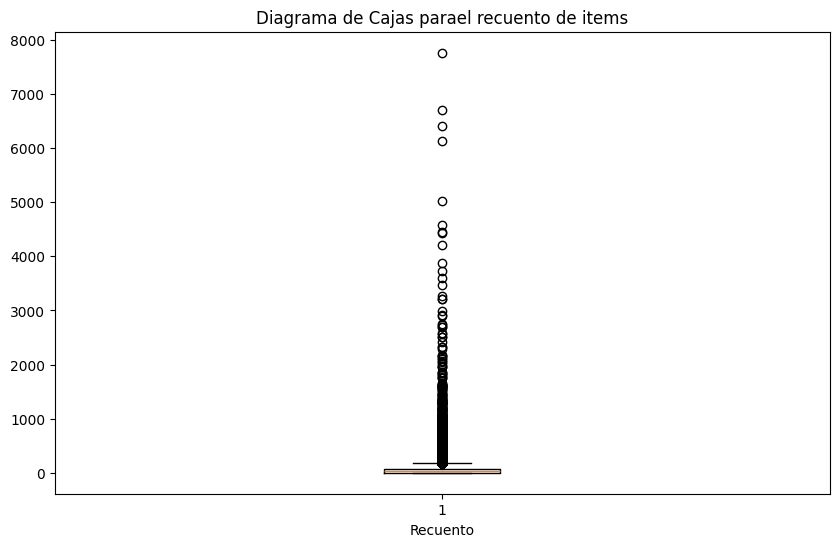

In [29]:
# Vemos el Diagrama de caja
plt.figure(figsize=(10, 6))
plt.boxplot(x=df_items['items_count'], vert=True)
plt.title('Diagrama de Cajas parael recuento de items')
plt.xlabel('Recuento')
plt.show()

+ **Mayoría de usuarios con pocos juegos:** La mayoría de los usuarios tienen un número relativamente bajo de juegos, como se evidencia por la mediana baja y la concentración de datos en la parte inferior del gráfico.
+ **Usuarios extremos:** Un número significativo de usuarios posee una cantidad muy alta de juegos, lo cual es inusual comparado con la mayoría. Esto puede ser interesante para análisis adicionales, como identificar características comunes de estos usuarios.

In [13]:
Total = df_items['items_count'].sum()
print('Suma total de items:', Total)

Suma total de items: 5153209


In [44]:
Total = (df_items['items_count'].mean())
print('Promedio de items:', Total)

Promedio de items: 58.353629260559394


In [45]:
Total = (df_items['items_count'].median())
print('Mediana de items:', Total)

Mediana de items: 26.0


In [21]:
counts = df_items[['user_id', 'items_count']]
sorted_counts = counts.sort_values(by='items_count', ascending=False)

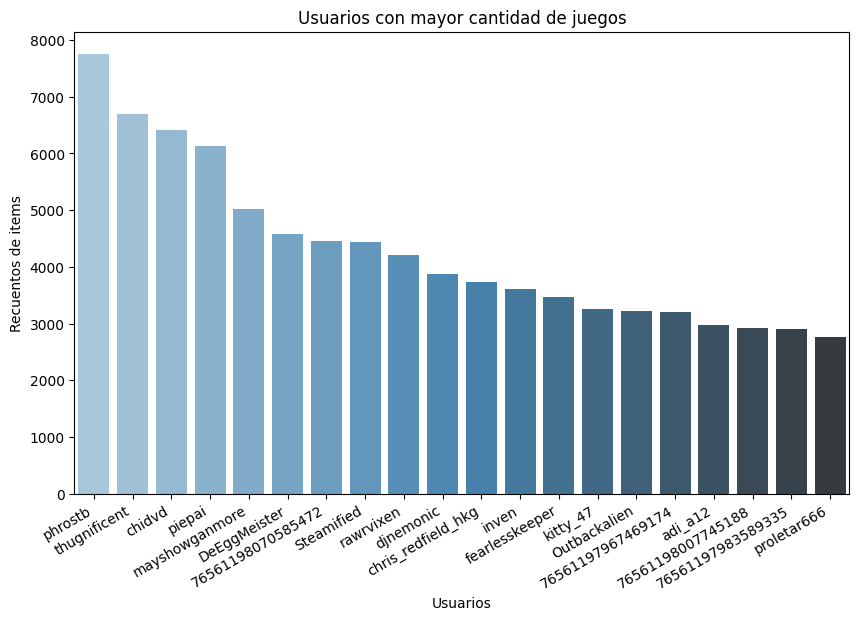

In [23]:
# Vamos a observar los recuentos de items mas altos
N = 20
top_count = sorted_counts.head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x = 'user_id' , y='items_count', data=top_count, palette='Blues_d')
plt.title("Usuarios con mayor cantidad de juegos")
plt.xlabel("Usuarios")
plt.ylabel("Recuentos de items")
plt.xticks(rotation=30, ha='right')
plt.show()

###  ***Data***  ***reviews***

### 2.4 Carga inicial de los datos

In [32]:
# Cargar archivos
df = load_json_lines("Data/australian_user_reviews.json ")

In [33]:
# Tenemos un punto de reinicio 
df_reviews = df

### 2.5 Análisis inicial de los datos

In [34]:
# Tamaño de los datos 
df_reviews.shape

(25799, 3)

In [36]:
# Columnas
df_reviews.columns

Index(['user_id', 'user_url', 'reviews'], dtype='object')

In [39]:
# Tipos de datos 
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25799 entries, 0 to 25798
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   25799 non-null  object
 1   user_url  25799 non-null  object
 2   reviews   25799 non-null  object
dtypes: object(3)
memory usage: 604.8+ KB


In [40]:
df_reviews.head(3)

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."


##### Para terminar nuestros analísis, tenemos columnas anidadas en los 3 Datasets, pudimos responder algunas preguntas, otras no porque las columnas no estaba transformadas, ahora procedemos al ETL 